In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path of folder
folder_path = '/content/drive/MyDrive/Colab Notebooks/2024_08_05/'

# Get list of all CSV files in the folder
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to hold the dataframes
dfs = []

# Loop through the CSV files and read each one into a dataframe
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)





Mounted at /content/drive


<ipython-input-1-5122d2b63a5e>:28: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-5122d2b63a5e>:28: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [2]:
# Filter data for the specific Alarm Name
filtered_data = data[data['Alarm Name'] == 'RF Unit TX Channel Gain Out of Range']

# Get the unique Site IDs
site_ids = filtered_data['Site ID'].unique()

# Print the Site IDs
print(site_ids)

['PO0052' 'MU0045' 'AN5091' 'AM0071' 'GM0405' 'AM0037' 'KU0191' 'GM0308'
 'KU0075' 'MA0036' 'KU0069' 'PU0076' 'CM0585' 'CM0445' 'GM0655' 'CM0892'
 'KU0124' 'KU0360' 'CM0204' 'PU0020' 'GM0171' 'CM0897' 'KU0067' 'KA0072'
 'JA0023' 'KL0063' 'KL0116' 'KU0553' 'KI0027' 'KL0106' 'GM0003' 'AN0023'
 'AM0212' 'AM0082' 'GM0278' 'CM1346' 'CM0243' 'CM0065' 'MU0057' 'CM0477'
 'MA0006' 'CM2102' 'KU0045' 'CM0116' 'CM1054' 'GM0162' 'CM0363' 'CM0517'
 'PU0008' 'PU0062' 'GM0015' 'GM0131' 'CM0154' 'GM0745' 'GM0137' 'HA0035'
 'AM0046' 'JA0060' 'KL0015' 'KU0041' 'KU0164' 'GM0009' 'JA5081' 'CM1226'
 'CM0406' 'CM0276' 'CM0033' 'KA0128' 'CM0206' 'GM0373' 'CM1114' 'HA0008'
 'CM1031' 'CM0405' 'GA0034' 'JA0014' 'CM0737' 'KI0099' 'CM0180' 'GM0098'
 'CM0399' 'KU0004' 'TR0008' 'CM0584' 'CM0435' 'CM0590' 'GM0477' 'JA0055'
 'PU0031' 'CM0007' 'MA0045' 'TR0123' 'GM0584' 'GM0067' 'KU0648' 'TR0041'
 'GM0189' 'VA0019' 'AM0118' 'CM0535' 'BA0034' 'CM0178' 'AN0228' 'PU0092'
 'GM5024' 'TR0074' 'KE0017' 'CM0185' 'CM0576' 'AN00

In [3]:
# Filter the initial dataset to get all alarms for the identified Site IDs
alarms_for_site_ids = data[data['Site ID'].isin(site_ids)]

# Print the filtered alarms
print("Alarms for the identified Site IDs:")
alarms_for_site_ids.head()

Alarms for the identified Site IDs:


,Last Occurred On,Alarm Source,Alarm Severity,Alarm Name,Alarm ID,Alarm Location Info,Site Name,Cleared On,First Occurred On,Clearance Status,Ticket ID,Site ID,Vendor,Domain,Device Type
4,2024-08-02 02:53:10,Waterfront_B5_Suites_4-CM2074-K,Major,RF Out of Service,29248,eNodeB Function Name=Waterfront_B5_Suites_4-CM...,Waterfront_Indoor,2024-08-04 03:17:31,2024-02-22 02:50:10,Cleared,NaN,CM2074,HUAWEI,Access,eNodeB
13,2024-07-21 18:30:11,2nd_Cross_St-CM0862-DG,Critical,Battery Deep Discharge Alarm,65089,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2nd_Cross_St,2024-08-04 03:17:31,2024-03-10 03:45:45,Cleared,NaN,CM0862,HUAWEI,Power,eGBTS
14,2024-07-21 18:17:49,2nd_Cross_St-CM0862-BHOP,Critical,Battery Deep Discharge Alarm,65089,"Cabinet No.=0, Subrack No.=0, Slot No.=19, Por...",2nd_Cross_St,2024-08-04 03:17:31,2024-03-10 03:43:44,Cleared,NaN,CM0862,HUAWEI,Power,eNodeB
17,2024-07-10 12:04:45,Waterfront_B1_B2_B3_Active_Ind-CM2074-K,Major,RF Out of Service,29248,eNodeB Function Name=Waterfront_B1_B2_B3_Activ...,Waterfront_Indoor,2024-07-11 09:17:31,2024-04-26 14:54:52,Cleared,NaN,CM2074,HUAWEI,Access,NaN
22,2024-07-06 06:16:28,Kildas_Lane_School-CM0963-DG,Major,GSM Local Cell Unusable,28016,GBTS Function Name=Kildas_Lane_School-CM0963-D...,Kildas_Lane,2024-07-06 08:17:31,2024-03-10 04:45:14,Cleared,NaN,CM0963,HUAWEI,Access,eGBTS


In [4]:
# Sort by 'First Occurred On' in descending order (latest alarms first)
alarms_for_site_ids = alarms_for_site_ids.sort_values(by='First Occurred On', ascending=False)

# Convert 'First Occurred On' to datetime
alarms_for_site_ids['First Occurred On'] = pd.to_datetime(alarms_for_site_ids['First Occurred On'], errors='coerce')

# Reference time
reference_time = pd.to_datetime('2024-08-05 08:00:00')

# Calculate the relative day index, handle NaT by filling with a large negative number
alarms_for_site_ids['Relative Day Index'] = ((alarms_for_site_ids['First Occurred On'] - reference_time).dt.total_seconds() // 86400).fillna(-9999).astype(int)

# Adjust the index to set the 08:00 to 08:00 of the next day as 0, and previous days as -1, -2, -3, etc.
alarms_for_site_ids['Relative Day Index'] = alarms_for_site_ids['Relative Day Index'].apply(lambda x: x if x < 0 else x)

# Print the updated dataframe
alarms_for_site_ids.head(50000)

# Retain only the specified columns
columns_to_keep = ['Site ID', 'Alarm Name', 'Vendor', 'Domain', 'Device Type', 'Relative Day Index']
alarms_for_site_ids = alarms_for_site_ids[columns_to_keep]
input_df = alarms_for_site_ids.copy()

alarms_for_site_ids.head(50000)


,Site ID,Alarm Name,Vendor,Domain,Device Type,Relative Day Index
6748046,CM0862,Mains Failure Alarm,HUAWEI,Power,eNodeB,0
6748047,CM0862,Mains Failure Alarm,HUAWEI,Power,eGBTS,0
2895982,CM0222,Mains Failure Alarm,HUAWEI,Power,GBTS,0
2895980,CM0204,Mains Failure Alarm,HUAWEI,Power,GBTS,0
6748237,PO0042,Battery Deep Discharge Alarm,HUAWEI,Power,GBTS,0
...,...,...,...,...,...,...
4992149,CM2074,ALC Controlling Threshold Crossing,HUAWEI,Access,eNodeB,-50
4991648,GM0015,eNodeB S1 Control Plane Transmission Interruption,HUAWEI,Access,eNodeB,-50
4992153,GM0015,NE Is Disconnected,HUAWEI,Access,eNodeB,-50
4992161,GM0015,NE Is Disconnected,HUAWEI,Access,eNodeB,-50


In [5]:
# Find 15 unique alarms before each 'RF Unit TX Channel Gain Out of Range' alarm for each Site ID
patterns = []
for site_id in site_ids:
    site_data = alarms_for_site_ids[alarms_for_site_ids['Site ID'] == site_id]
    specific_alarm_times = site_data[site_data['Alarm Name'] == 'RF Unit TX Channel Gain Out of Range']['Relative Day Index']

    for alarm_time in specific_alarm_times:
        # Get alarms before the specific alarm
        alarms_before = site_data[site_data['Relative Day Index'] < alarm_time]
        unique_alarms = alarms_before['Alarm Name'].unique()[:15]  # Limit to 15 unique alarms
        patterns.append((site_id, unique_alarms))

filtered_patterns = [(site_id, [alarm for alarm in alarms if alarm != 'RF Unit TX Channel Gain Out of Range'])
                     for site_id, alarms in patterns]

# Create a dataframe from the filtered patterns
pattern_df = pd.DataFrame(filtered_patterns, columns=['Site ID', 'Unique Alarms'])

# Print the dataframe
pattern_df.sample(20)


,Site ID,Unique Alarms
2209,HA0035,[User Plane Fault]
4029,GM0694,"[RF Unit Maintenance Link Failure, Cell Unavai..."
5940,KU0070,"[Cell Unavailable, User Plane Fault, Mains Fai..."
3962,BA5020,"[Mains Failure Alarm, Time Synchronization Fai..."
456,KU0069,"[Cell Out of Service, NE Is Disconnected, Batt..."
3051,TR0123,"[Cell Out of Service, GSM Local Cell Unusable,..."
5371,CM0121,"[Generator On Load Alarm, Battery Deep Dischar..."
3190,GM0584,"[Mains Failure Alarm, BSL Fault, Cell Out of S..."
1120,KU0360,"[Mains Failure Alarm, S1 Interface Fault, SCTP..."
5112,CM0121,"[Generator On Load Alarm, User Plane Fault, Ce..."


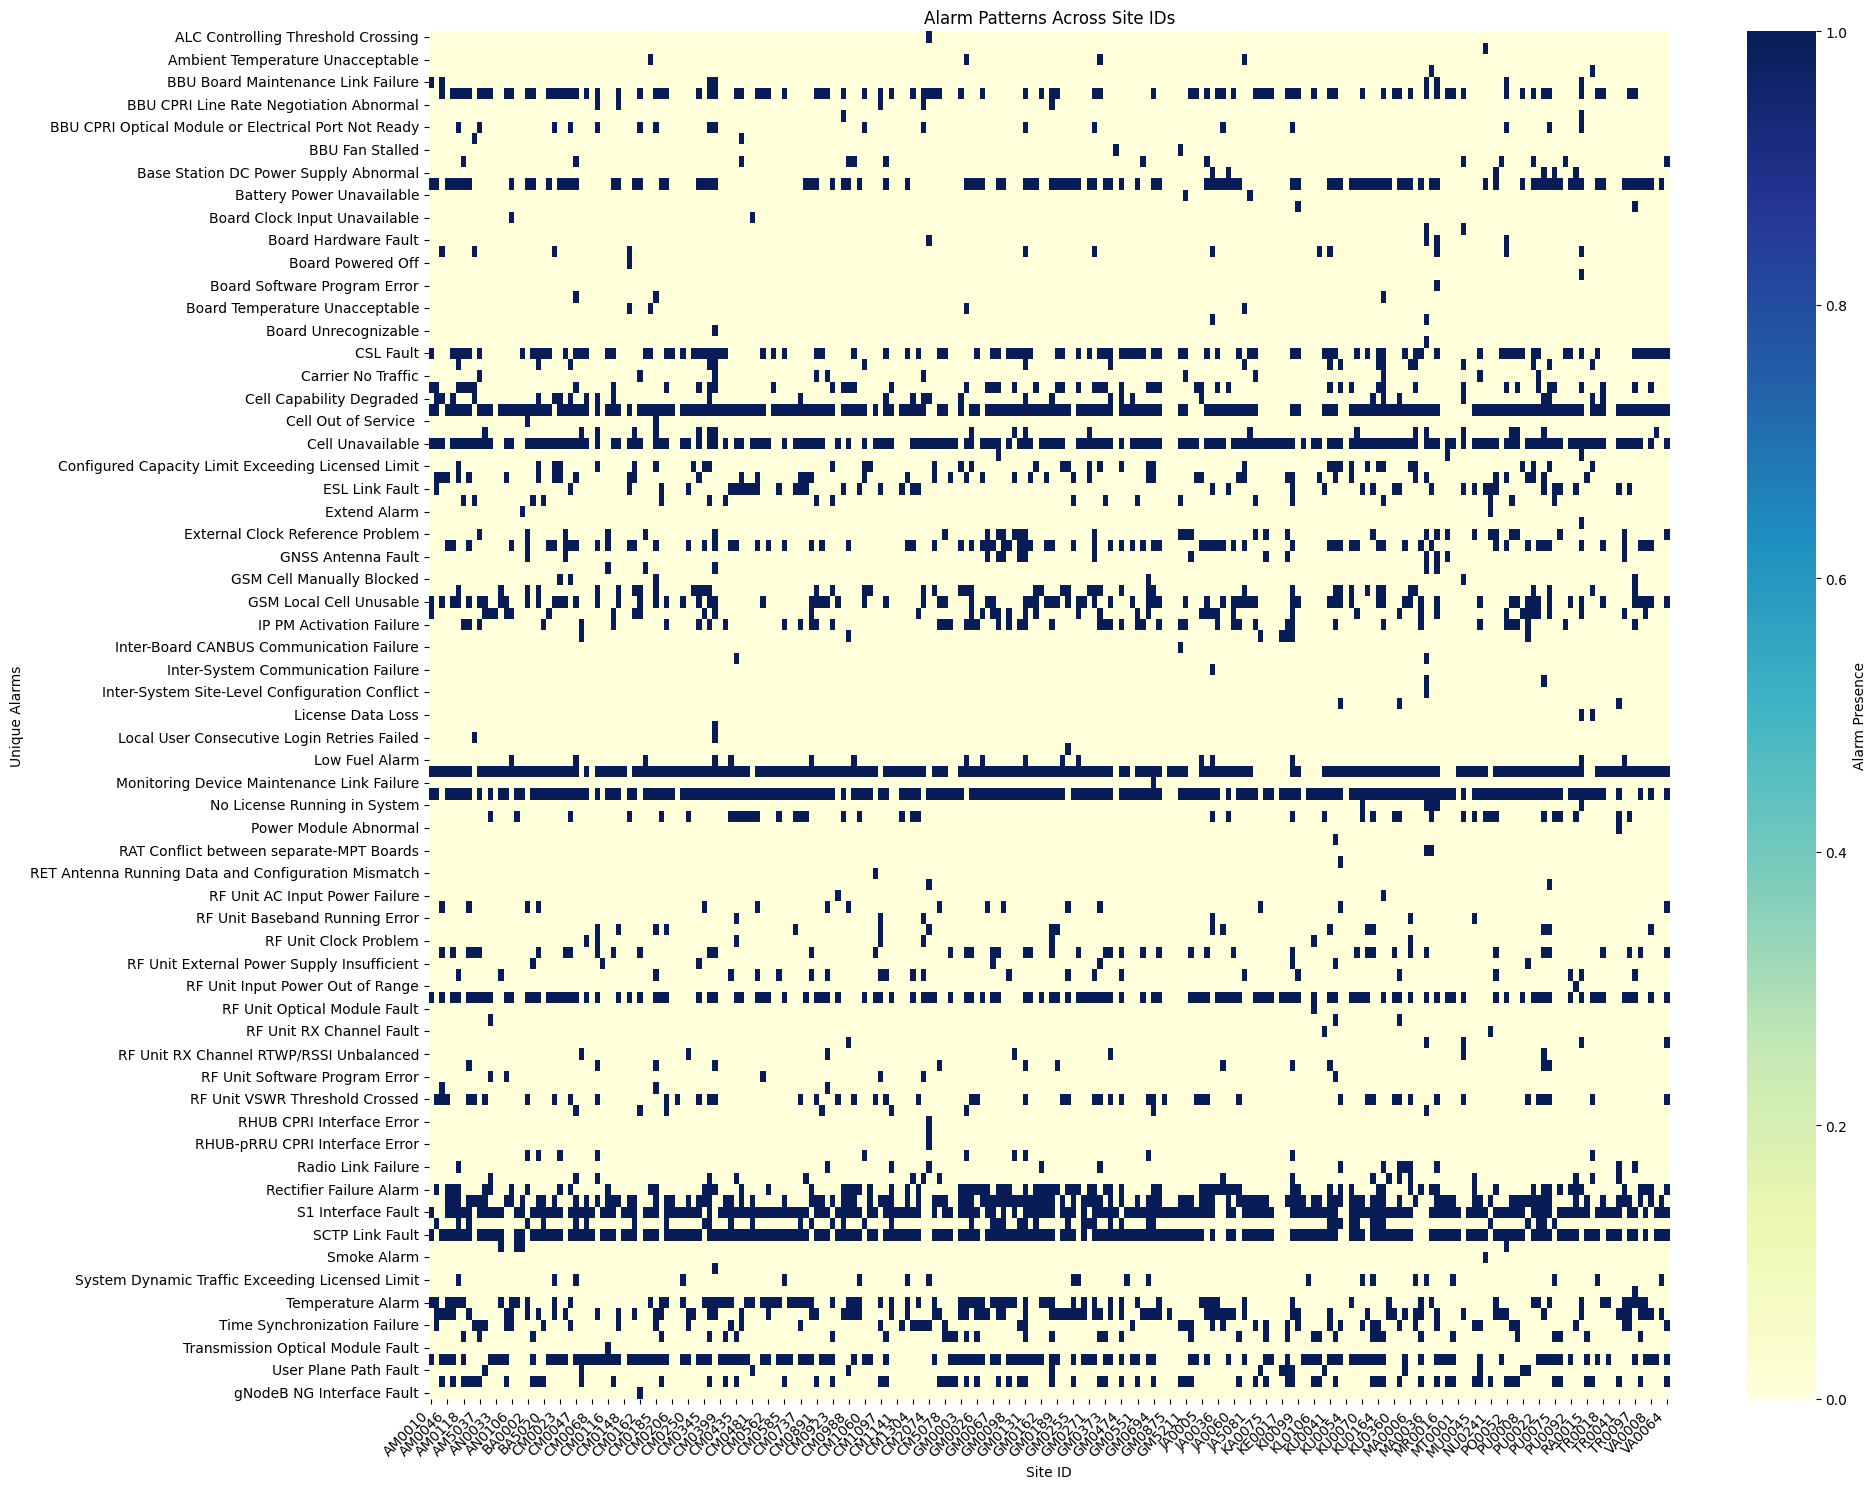

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a binary matrix indicating the presence or absence of each alarm for each site
alarm_matrix = pattern_df.explode('Unique Alarms').pivot_table(index='Unique Alarms', columns='Site ID', aggfunc=lambda x: 1, fill_value=0)

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(alarm_matrix, cmap="YlGnBu", cbar_kws={'label': 'Alarm Presence'})
plt.title('Alarm Patterns Across Site IDs')
plt.ylabel('Unique Alarms')
plt.xlabel('Site ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:

# Flatten the list of unique alarms for each Site ID
all_unique_alarms = [alarm for sublist in pattern_df['Unique Alarms'] for alarm in sublist]

# Create a DataFrame to count the frequency of each alarm
alarm_counts = pd.DataFrame(all_unique_alarms, columns=['Alarm Name']).value_counts().reset_index(name='Frequency')

# Calculate the threshold for common alarms (e.g., alarms present in at least 100% of Site IDs)
threshold = len(site_ids) * 1

# Identify common alarms based on the threshold
common_alarms = alarm_counts[alarm_counts['Frequency'] >= threshold]

# Print the common alarms
print("Common Alarms:")
print(common_alarms)

Common Alarms:
                                           Alarm Name  Frequency
0                                 Mains Failure Alarm       5550
1                                    Cell Unavailable       5141
2                                 Cell Out of Service       5090
3                                     SCTP Link Fault       4807
4                                  S1 Interface Fault       4688
5                                  NE Is Disconnected       4477
6                                    User Plane Fault       3538
7                     Remote Maintenance Link Failure       3060
8                                           CSL Fault       2829
9                             GSM Local Cell Unusable       2604
10                                        Theft Alarm       2313
11                       Battery Deep Discharge Alarm       2225
12  eNodeB S1 Control Plane Transmission Interruption       2145
13                                 Fuse Failure Alarm       1725
14        

In [8]:
import pandas as pd

# Define the number of days to consider
days_to_consider = 7

# Get the latest date from the data
latest_date = alarms_for_site_ids['Relative Day Index'].max()

# Filter data to include only the latest 10 days
recent_data = alarms_for_site_ids[alarms_for_site_ids['Relative Day Index'] >= latest_date - days_to_consider]

# Compute the 50% threshold for the number of common alarms
num_common_alarms = len(common_alarms)
required_alarms_count = int(num_common_alarms * 0.30)

# Predict occurrence of the target alarm based on the 30% threshold
def prepare_data(site_data, target_alarm):
    # Filter to include only the latest 10 days
    recent_site_data = site_data[site_data['Relative Day Index'] >= latest_date - days_to_consider]

    # Get the presence of common alarms
    alarms_before = recent_site_data[recent_site_data['Alarm Name'] != target_alarm]
    alarm_names = alarms_before['Alarm Name'].unique()



    common_alarm_names = common_alarms['Alarm Name'].tolist()
    present_common_alarms = [alarm for alarm in common_alarm_names if alarm in alarm_names]

    # Check if 30% of common alarms are present
    is_target_alarm = len(present_common_alarms) >= required_alarms_count
    return present_common_alarms, int(is_target_alarm)



In [9]:
# Create feature and target arrays for model training
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import joblib
X = []
y = []

for site_id in site_ids:
    site_data = alarms_for_site_ids[alarms_for_site_ids['Site ID'] == site_id]
    features, target = prepare_data(site_data, 'RF Unit TX Channel Gain Out of Range')
    X.append(features)
    y.append(target)

# Convert to DataFrame
X_df = pd.DataFrame(X) # Convert X to a DataFrame first
# Convert all feature values to strings
X_df = X_df.applymap(str)
y_df = pd.DataFrame(y, columns=['Target'])

# Encode categorical features
# Identify categorical columns
categorical_cols = X_df.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

<ipython-input-9-6f8c12a96700>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_df = X_df.applymap(str)


In [10]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,Mains Failure Alarm,Battery Deep Discharge Alarm,Generator On Load Alarm,SCTP Link Congestion,Data Configuration Exceeding Licensed Limit,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Mains Failure Alarm,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Mains Failure Alarm,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Mains Failure Alarm,Cell Unavailable,User Plane Fault,Theft Alarm,Battery Deep Discharge Alarm,Fuse Failure Alarm,RF Unit Maintenance Link Failure,SCTP Link Congestion,BBU CPRI Interface Error,RF Unit DC Input Power Failure,...,None,None,None,None,None,None,None,None,None,None
4,Mains Failure Alarm,User Plane Fault,RF Unit VSWR Threshold Crossed,Temperature Alarm,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [11]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

# Initialize and train the model
pipeline.fit(X_train, y_train.values.ravel())

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00         2

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [12]:
import pandas as pd
from datetime import datetime, timedelta

# Prompt the user for a Site ID
site_id = input("Enter the Site ID: ")

# Get the current date
current_date = datetime.now()

# Calculate the date 7 days ago
past_date = current_date - timedelta(days=7)

# Convert 'past_date' to a relative day index
reference_date = datetime(2024, 8, 5)  # Example reference date
past_date_index = (past_date - reference_date).days

# Filter the DataFrame for the specified Site ID and the past 7 days
site_data = input_df[(input_df['Site ID'] == site_id) & (input_df['Relative Day Index'] >= past_date_index)]

if site_data.empty:
    print("No data found for the specified Site ID and date range.")
else:
    # Retrieve the feature names used during training
    feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()

    # Print feature names for debugging
    print("Feature names used for training:", feature_names)

    # Create a DataFrame to store the generated features
    feature_data = pd.DataFrame(index=site_data.index)

    # Generate features for each feature name used in the model
    for feature in feature_names:
        if 'Alarm Name' in feature:
            # Extract the alarm name part
            feature_name = feature.split('_', 1)[1]
            # Create a one-hot encoded feature based on alarm names
            feature_data[feature] = (site_data['Alarm Name'] == feature_name).astype(int)

    # Print the columns of the generated features
    print("Generated feature columns:", feature_data.columns)

    # Filter features to keep only those that are in feature_names
    filtered_feature_data = feature_data[feature_data.columns.intersection(feature_names)]

    # Check if all feature_names are present in the filtered_feature_data columns
    if all(feature in filtered_feature_data.columns for feature in feature_names):
        # Ensure feature_data includes only the columns in feature_names and in correct order
        filtered_feature_data = filtered_feature_data.reindex(columns=feature_names, fill_value=0)

        # Print the columns to debug
        print("Filtered feature data columns:", filtered_feature_data.columns)

        # Apply the same preprocessing steps as in the pipeline
        try:
            feature_data_transformed = pipeline.named_steps['preprocessor'].transform(filtered_feature_data)

            # Print the transformed feature data shape
            print("Shape of transformed feature data:", feature_data_transformed.shape)

            # Predict the probability of the target alarm occurring
            alarm_probabilities = pipeline.named_steps['classifier'].predict_proba(feature_data_transformed)

            # Print the probabilities
            print(f"Probability of the target alarm NOT occurring: {alarm_probabilities[0][0]:.2f}")
            print(f"Probability of the target alarm occurring: {alarm_probabilities[0][1]:.2f}")
        except ValueError as e:
            print(f"Error during transformation or prediction: {e}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")
    else:
        print("Not all required features are present. Prediction cannot be made.")


Enter the Site ID: AN0023
Feature names used for training: ['x0_Cell Out of Service' 'x0_Cell Unavailable'
 'x0_External Clock Reference Problem' 'x0_Mains Failure Alarm' 'x0_None'
 'x0_RF Unit Maintenance Link Failure' 'x0_Rectifier Failure Alarm'
 'x0_SCTP Link Congestion' 'x0_Temperature Alarm' 'x0_Theft Alarm'
 'x0_User Plane Fault' 'x0_User Plane Path Fault'
 'x1_BBU CPRI Interface Error' 'x1_Battery Deep Discharge Alarm'
 'x1_Cell Out of Service'
 'x1_Cell RX Channel Interference Noise Power Unbalanced'
 'x1_Cell Unavailable' 'x1_External Clock Reference Problem'
 'x1_GSM Local Cell Unusable' 'x1_Generator On Load Alarm'
 'x1_IP PM Activation Failure' 'x1_None' 'x1_RF Unit Hardware Fault'
 'x1_RF Unit Maintenance Link Failure' 'x1_RF Unit VSWR Threshold Crossed'
 'x1_Rectifier Failure Alarm' 'x1_Remote Maintenance Link Failure'
 'x1_SCTP Link Congestion' 'x1_Temperature Alarm' 'x1_Theft Alarm'
 'x1_User Plane Fault' 'x2_BBU CPRI Interface Error'
 'x2_Battery Deep Discharge Alarm'